# RUN in collab only, downloads dataseta automatically

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
data_dir

'./datasets/flower_photos'

In [5]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob("*/*.jpg"))

[PosixPath('datasets/flower_photos/sunflowers/13117907313_86c99c6441.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/22755811033_cd17b109e0.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/4489516263_e49fe82637_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9240005603_6a9b71dcea_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/15054866898_60ee50ec6b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/18237156988_9ceb46a8de_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5025805406_033cb03475_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9564240106_0577e919da_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/184682652_c927a49226_m.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7728953426_abd179ab63.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/19359539074_d7e32e6616_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7581713708_8eae6794f2.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3001536784_3bfd101b23_n.jpg'),
 Po

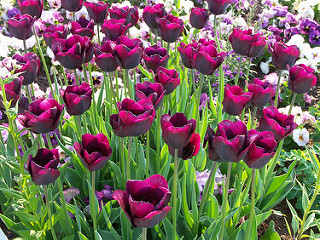

In [7]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[9]))

In [8]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*')),
}

In [9]:
flower_images_dict['roses']

[PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'),
 PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'),
 PosixPath('datasets/flower_photos/roses/3415176946_248afe9f32.jpg'),
 PosixPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg'),
 PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'),
 PosixPath('datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg'),
 PosixPath('datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'),
 PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'),
 PosixPath('datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'),
 PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'),
 Posix

In [10]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}

In [11]:
str(flower_images_dict)

"{'roses': [PosixPath('datasets/flower_photos/roses/2535466143_5823e48b63.jpg'), PosixPath('datasets/flower_photos/roses/3115889021_053f3b8e5a.jpg'), PosixPath('datasets/flower_photos/roses/3415176946_248afe9f32.jpg'), PosixPath('datasets/flower_photos/roses/11102341464_508d558dfc_n.jpg'), PosixPath('datasets/flower_photos/roses/6879112993_5a29208438_n.jpg'), PosixPath('datasets/flower_photos/roses/12240165555_98625b1e88_n.jpg'), PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'), PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg'), PosixPath('datasets/flower_photos/roses/5060536705_b370a5c543_n.jpg'), PosixPath('datasets/flower_photos/roses/4256169180_55df2048a0.jpg'), PosixPath('datasets/flower_photos/roses/1775233884_12ff5a124f.jpg'), PosixPath('datasets/flower_photos/roses/2300959680_8d22fa5ee2.jpg'), PosixPath('datasets/flower_photos/roses/3265902330_d8b1e44545.jpg'), PosixPath('datasets/flower_photos/roses/4713531680_1110a2fa07_n.jpg'), PosixPat

In [12]:
x,y=[],[]
for flower_name,images in flower_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flower_labels_dict[flower_name])

array([[[190, 186, 137],
        [192, 189, 143],
        [196, 190, 147],
        ...,
        [190, 184, 141],
        [184, 186, 133],
        [186, 185, 128]],

       [[191, 185, 139],
        [195, 188, 147],
        [199, 194, 149],
        ...,
        [191, 190, 132],
        [188, 188, 136],
        [189, 186, 134]],

       [[195, 187, 147],
        [196, 191, 139],
        [201, 195, 150],
        ...,
        [191, 190, 137],
        [186, 188, 136],
        [189, 186, 134]],

       ...,

       [[ 60,  73,  46],
        [ 52,  73,  42],
        [ 57,  74,  45],
        ...,
        [ 14,  13,   1],
        [ 15,  11,   2],
        [ 15,   4,   1]],

       [[ 62,  71,  52],
        [ 59,  69,  50],
        [ 57,  74,  50],
        ...,
        [ 20,   8,   1],
        [ 18,  10,   0],
        [ 18,   6,   2]],

       [[ 48,  75,  40],
        [ 58,  72,  48],
        [ 56,  75,  50],
        ...,
        [ 16,   9,   1],
        [ 21,  10,   0],
        [ 13,   8,   1]]], dtype=uint8)
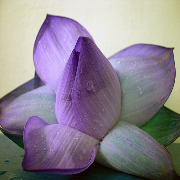

In [13]:
x[0]

In [14]:
y[0]

0

In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
len(x_train)

2936

In [18]:
x_train_scaled,x_test_scaled=x_train/255,x_test/255

In [19]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',input_shape=(180,180,3),activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu',),
    layers.Dense(5,activation='softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_scaled,y_train,epochs=30)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 18s 126ms/step - accuracy: 0.3445 - loss: 1.6825
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5686 - loss: 1.0548
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6778 - loss: 0.8412
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7682 - loss: 0.6254
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.8312 - loss: 0.4628
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9257 - loss: 0.2416
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9498 - loss: 0.1454
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9788 - loss: 0.0909
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9937 - loss: 0.0350
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9931 - loss: 0.0287
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9900 - loss: 0.0347
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accurac

In [20]:
model.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6343 - loss: 2.9535


[3.0376150608062744, 0.6267030239105225]

**accuracy dropped to 60 in test case:->case of overfitting**

In [21]:
y_pred=model.predict(x_test_scaled)
y_pred

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


array([[3.9738588e-04, 9.9960238e-01, 2.5654751e-07, 9.4094376e-12,
        1.4997756e-09],
       [9.9968576e-01, 6.2894312e-09, 1.9681949e-11, 4.0192243e-15,
        3.1424078e-04],
       [2.6609094e-08, 3.0385743e-09, 1.0000000e+00, 4.8534808e-16,
        1.8368899e-08],
       ...,
       [1.4687127e-11, 1.0000000e+00, 2.8242694e-08, 8.9621553e-18,
        7.6580116e-13],
       [1.9015537e-05, 4.6989895e-02, 3.2979685e-03, 2.2906804e-02,
        9.2678630e-01],
       [9.5577061e-06, 1.2160163e-02, 4.7623155e-01, 5.3725889e-05,
        5.1154500e-01]], dtype=float32)

In [24]:
np.argmax(np.array(y_pred)[0])

1

In [25]:

y_test[0]

1

Now the Data is augmented

In [48]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                                                 input_shape=(180,
                                                              180,
                                                              3)),
    layers.RandomRotation(0.5),
    layers.RandomZoom(0.1),
  ]
)

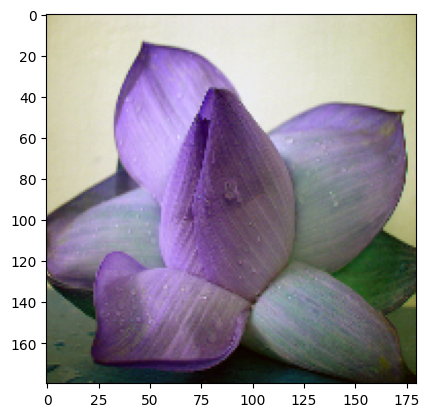

In [27]:
plt.imshow(x[0])

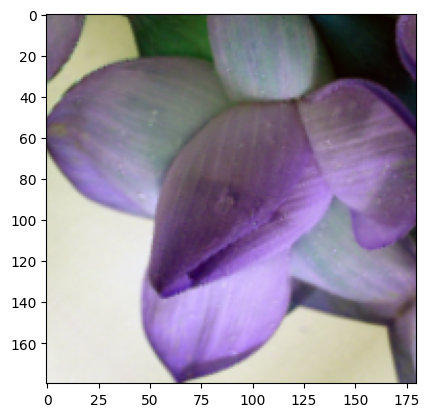

In [49]:
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

**Now train a model with feeding augmented data**

In [50]:
model2=Sequential([
    data_augmentation,

    layers.Conv2D(16,3,padding='same',input_shape=(180,180,3),activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation='relu',),
    layers.Dense(5,activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model2.fit(x_train_scaled,y_train,epochs=30)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3438 - loss: 1.5584
Epoch 2/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.5667 - loss: 1.0790
Epoch 3/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6233 - loss: 0.9371
Epoch 4/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6365 - loss: 0.9045
Epoch 5/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6740 - loss: 0.8363
Epoch 6/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6725 - loss: 0.8286
Epoch 7/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6909 - loss: 0.7936
Epoch 8/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6737 - loss: 0.7882
Epoch 9/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7009 - loss: 0.7632
Epoch 10/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7171 - loss: 0.7181
Epoch 11/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7172 - loss: 0.7159
Epoch 12/30
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy:

In [52]:
model2.evaluate(x_test_scaled,y_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6975 - loss: 0.7905


[0.7885066270828247, 0.7016348838806152]

Accuracy increased by 10%